In [1]:
import numpy as np
import random
import math

In [2]:
LEADER = "leader"
VALIDATOR = "validator"
NUMBER_OF_DEPOSIT = "deposit"
NODE = "node"
SPEED = "speed"
RANKING = "ranking"
TRUST = "trust"
NUMBER_OF_EPOCH = "epoch"
LEADER_TEST = "leader_test"
VALIDATOR_TEST = "validator_test"

#init nodes
def init_nodes(number_of_node):
    nodes = []
    for i in range(number_of_node):
        nodes.append({})
        nodes[i][NODE] = i+1
        nodes[i][SPEED] = 0
        nodes[i][RANKING] = 0
        nodes[i][TRUST] = 0
        nodes[i][LEADER] = 0
        nodes[i][VALIDATOR] = 0
        nodes[i][NUMBER_OF_DEPOSIT] = 0
        nodes[i][NUMBER_OF_EPOCH] = 0
        nodes[i][LEADER_TEST] = 0
        nodes[i][VALIDATOR_TEST] = 0
        
    return nodes

In [3]:
#random speed of nodes
def random_nodes_speed(nodes):
    arr_speed = np.random.randint(low=5,high=10,size=len(nodes)).tolist()
    for i in range(len(arr_speed)):
        nodes[i][SPEED] = arr_speed[i]
    return arr_speed

In [4]:
#random number of epochs that masternode join in blockchain
def random_epochs_of_nodes(nodes, total_epoch):
    arr_epochs = np.random.randint(low=total_epoch/2,high=total_epoch,size=len(nodes)).tolist()
    for i in range(len(nodes)):
        nodes[i][NUMBER_OF_EPOCH] = arr_epochs[i]
    return arr_epochs

In [5]:
def random_leader(nodes):
    maximum = -1
    index_of_leader = -1
    arr_deposit = np.random.randint(low=50000,high=100000,size=len(nodes)).tolist()
    for i in range(len(arr_deposit)):
        if arr_deposit[i] > maximum:
            maximum = arr_deposit[i]
            index_of_leader = i
    nodes[index_of_leader][LEADER] += 1

In [6]:
def random_validator(nodes):
    maximum = -1
    index_of_validator = -1
    arr_validator = np.random.rand(len(nodes)).tolist()
    for i in range(len(arr_validator)):
        if arr_validator[i] > maximum:
            maximum = arr_validator[i]
            index_of_validator = i
    nodes[index_of_validator][VALIDATOR] += 1

In [28]:
def deposit_votes(nodes):
    deposit_vote_max = -1
    arr_deposit_vote = np.random.randint(low=80000,high=250000,size=len(nodes)).tolist()
#     arr_deposit_vote = np.sort(arr_deposit_vote)[::-1]
    for i in range(len(arr_deposit_vote)):
        nodes[i][NUMBER_OF_DEPOSIT] = arr_deposit_vote[i]
        if arr_deposit_vote[i] > deposit_vote_max:
            deposit_vote_max = arr_deposit_vote[i]
    return arr_deposit_vote, deposit_vote_max

In [8]:
# chose a leader node by voting
def vote_leader_test01(nodes):
    
    #random array with length is number of canidate of leader
    arr_random = np.random.rand(len(nodes)).tolist()
    
    #select lead node
    index_of_leader = -1
    maximum = -1
    arr_leader = []
    for i in range(len(nodes)):
        multi = nodes[i][NUMBER_OF_DEPOSIT] * arr_random[i]
        arr_leader.append(multi)
        if multi > maximum:
            index_of_leader = i
            maximum = arr_leader[i]
    nodes[index_of_leader][LEADER_TEST] += 1
    return index_of_leader

# chose a leader node by voting
def vote_leader_test02(nodes, arr_deposit_vote):
    index_of_leader = -1
    total_deposit = sum(arr_deposit_vote)
    randomInt = np.random.randint(low=1, high=total_deposit,size=1).tolist()[0]
    sub_total = total_deposit - randomInt
    for i in range(len(nodes)):
        if(sub_total) < arr_deposit_vote[i]:
            index_of_leader = i
            break
        else:
            sub_total = sub_total - arr_deposit_vote[i]
        
    nodes[index_of_leader][LEADER_TEST] += 1
    return index_of_leader

In [9]:
def softmax_stable(Z):
    """
    Compute softmax values for each sets of scores in Z.
    each column of Z is a set of score.    
    """
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A

In [10]:
# Trust for each masternode
def trust(nodes, arr_speed, total_epoch):
    trust_max = 0
    speed_arg = sum(arr_speed)/len(nodes)
    a,b,c,d = 0.25, 0.1, 0.3, 0.35
    for i in range(len(arr_deposit_vote)):
        trust = a*(nodes[i][NUMBER_OF_EPOCH]/total_epoch) + b*(
                nodes[i][SPEED]/speed_arg) + c*(
                nodes[i][LEADER]/nodes[i][NUMBER_OF_EPOCH]) + d*(
                nodes[i][VALIDATOR]/nodes[i][NUMBER_OF_EPOCH])
        nodes[i][TRUST] = trust
        if trust > trust_max:
            trust_max = trust
    return trust_max      

In [11]:
# Ranking for each masternode
def ranking(nodes, arr_deposit_vote, trust_max, deposit_max):
    total_deposit = sum(arr_deposit_vote)

    a = 0.25
    for i in range(len(nodes)):
        vote_deposit_avg = arr_deposit_vote[i] / deposit_max
        trust_avg = nodes[i][TRUST] / trust_max
        nodes[i][RANKING] = a * vote_deposit_avg + (1-a) * math.sqrt(trust_avg)
        print(vote_deposit_avg, ":", trust_avg)
        

In [51]:
# Random validator base on Ranking of each node
def choose_validator_test(nodes, leader):
    index_of_validator = -1
    maximum = -1
    
    arr_random = np.random.rand(len(nodes)).tolist()
    for i in range(len(arr_random)):
        if nodes[i][RANKING] == 0:
            point = arr_random[i]
        else:
            point = math.sqrt(nodes[i][RANKING]) * math.pow(arr_random[i],4)
            
        if point > maximum:
            maximum = point
            if i != leader:
                index_of_validator = i
                
    nodes[index_of_validator][VALIDATOR_TEST] += 1
#     print(index_of_validator+1, ':', nodes[index_of_validator][RANKING], '*', arr_random[index_of_validator])
    return index_of_validator

In [29]:
# Init nodes and data nodes
nodes = init_nodes(150)
total_epoch = 10000  # Total epoch in blockchain
arr_speed = random_nodes_speed(nodes)
random_epochs_of_nodes(nodes, total_epoch)
for i in range(total_epoch):
    random_leader(nodes)
    random_validator(nodes)

In [30]:
arr_deposit_vote, deposit_max = deposit_votes(nodes)
trust_max = trust(nodes, arr_speed, total_epoch)
ranking(nodes, arr_deposit_vote, trust_max, deposit_max)
# mean_deposit = []
# for i in range(len(arr_deposit_vote)):
#     mean_deposit.append(arr_deposit_vote[i]*arr_deposit_vote[i])

0.6148259202392341 : 0.7484932319817068
0.9490060049679655 : 0.7871744012265995
0.9706343400564322 : 0.7269816474137885
0.4409833034558711 : 0.6504266884990528
0.38912513967378637 : 0.7336298055444336
0.4607948744744648 : 0.7294553356861827
0.8022178991454778 : 0.747150931905247
0.9455091360724133 : 0.7499255256639813
0.5873654509353119 : 0.8033565872069393
0.9879056568888317 : 0.6291788040212559
0.3476008263864884 : 0.5825137108734945
0.47622129151024545 : 0.8038342226449952
0.3274074133620586 : 0.7494203260539934
0.5961036037846572 : 0.9380053253067613
0.6105131152680531 : 0.768310531864054
0.698115710185937 : 0.7255207206408656
0.7013312218140308 : 0.6737015412733085
0.8607442301663223 : 1.0
0.948443290433049 : 0.9100063768492413
0.40060853557561676 : 0.6968749531502404
0.7868638311213293 : 0.705043814557384
0.7484465059446771 : 0.6673371054580044
0.65679638576493 : 0.8293919238255206
0.7769841716440107 : 0.7565319293937232
0.6707316092831821 : 0.9574229721399411
0.5740411746263977 

In [81]:
for i in range(len(nodes)):
    nodes[i][LEADER_TEST] = 0
    nodes[i][VALIDATOR_TEST] = 0
for i in range(500000):
    leader_test = vote_leader_test01(nodes)
    validator_test = choose_validator_test(nodes, leader_test)

In [88]:
nodes.sort(key=lambda x: x[NODE])

In [89]:
x_array = []
leader_y_array = []
leader_test_y_array = []
validator_y_array = []
validator_test_y_array = []
deposit_y_array = []
epoch_y_array = []
ranking_y_array = []
trust_y_array = []
speed_y_array = []

for i in range(len(nodes)):
    x_array.append(i)
    leader_y_array.append(nodes[i][LEADER])
    leader_test_y_array.append(nodes[i][LEADER_TEST])
    deposit_y_array.append(nodes[i][NUMBER_OF_DEPOSIT])
    validator_y_array.append(nodes[i][VALIDATOR])
    validator_test_y_array.append(nodes[i][VALIDATOR_TEST])
    epoch_y_array.append(nodes[i][NUMBER_OF_EPOCH])
    ranking_y_array.append(nodes[i][RANKING])
    trust_y_array.append(nodes[i][TRUST])
    speed_y_array.append(nodes[i][SPEED])

In [79]:
validator_test_y_array_100000 = validator_test_y_array
leader_test_y_array_100000 = leader_test_y_array

In [84]:
# ranking_y_array_old = ranking_y_array
validator_test_y_array_500000 = validator_test_y_array
leader_test_y_array_500000 = leader_test_y_array

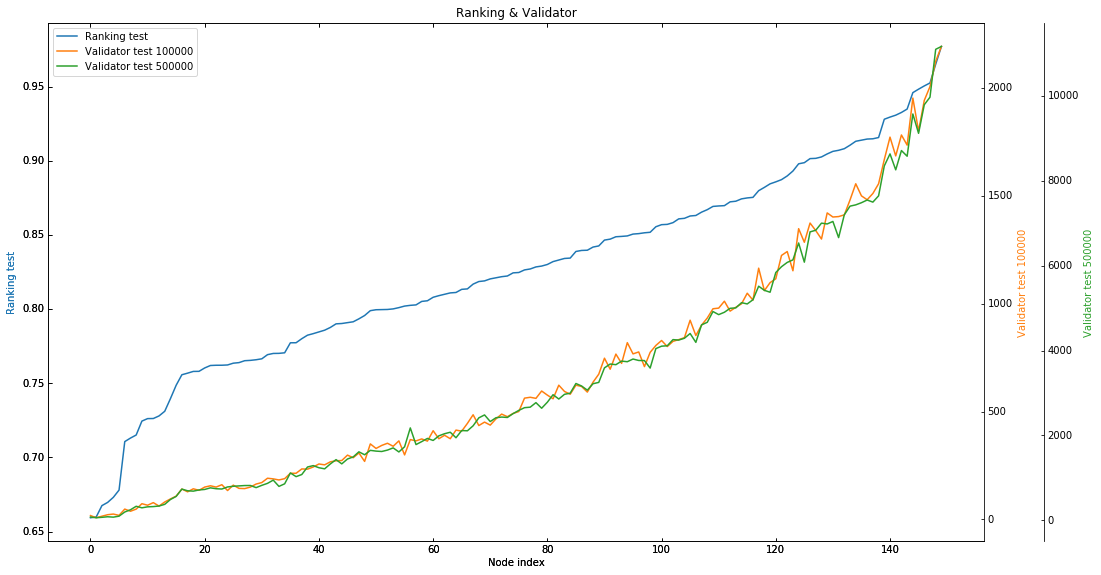

In [75]:
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 9))

host = HostAxes(fig, [0.15, 0.1, 0.65, 0.8])
par1 = ParasiteAxes(host, sharex=host)
par2 = ParasiteAxes(host, sharex=host)
host.parasites.append(par1)
host.parasites.append(par2)

host.axis["right"].set_visible(False)
par1.axis["right"].set_visible(True)

par1.axis["right"].major_ticklabels.set_visible(True)
par1.axis["right"].label.set_visible(True)

par2.set_ylabel("Validator test 500000")
offset = (60, 0)
new_axisline = par2.get_grid_helper().new_fixed_axis
par2.axis["right2"] = new_axisline(loc="right", axes=par2, offset=offset)

fig.add_axes(host)

host.set_xlabel("Node index")
host.set_ylabel("Ranking test")
par1.set_ylabel("Validator test 100000")

p1, = host.plot(x_array, ranking_y_array, label="Ranking test")
p2, = par1.plot(x_array, validator_test_y_array_100000, label="Validator test 100000")
p3, = par2.plot(x_array, validator_test_y_array_500000, label="Validator test 500000")

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right2"].label.set_color(p3.get_color())

plt.title("Ranking & Validator")
plt.show()

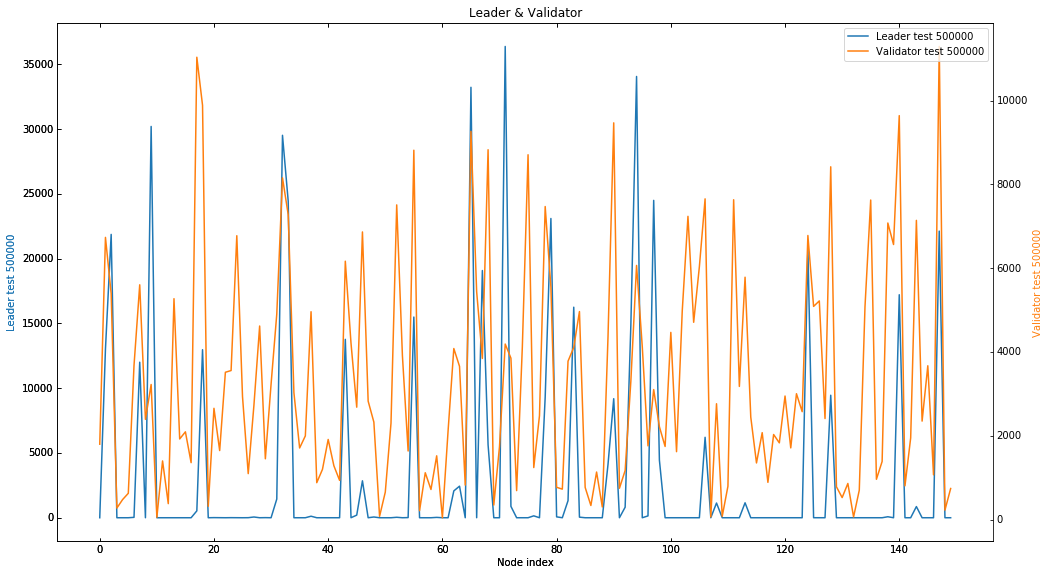

In [92]:
fig = plt.figure(figsize=(20, 9))

host = HostAxes(fig, [0.15, 0.1, 0.65, 0.8])
par1 = ParasiteAxes(host, sharex=host)
host.parasites.append(par1)

host.axis["right"].set_visible(False)
par1.axis["right"].set_visible(True)

par1.axis["right"].major_ticklabels.set_visible(True)
par1.axis["right"].label.set_visible(True)

fig.add_axes(host)

host.set_xlabel("Node index")
host.set_ylabel("Leader test 500000")
par1.set_ylabel("Validator test 500000")

p1, = host.plot(x_array, leader_test_y_array, label="Leader test 500000")
p2, = par1.plot(x_array, validator_test_y_array, label="Validator test 500000")

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())

plt.title("Leader & Validator")
plt.show()

In [91]:
nodes_validator_none = []
for i in range(len(nodes)):
    if nodes[i][VALIDATOR_TEST] == 0:
        nodes_validator_none.append(nodes[i])
# node_none
len(nodes_validator_none)

0

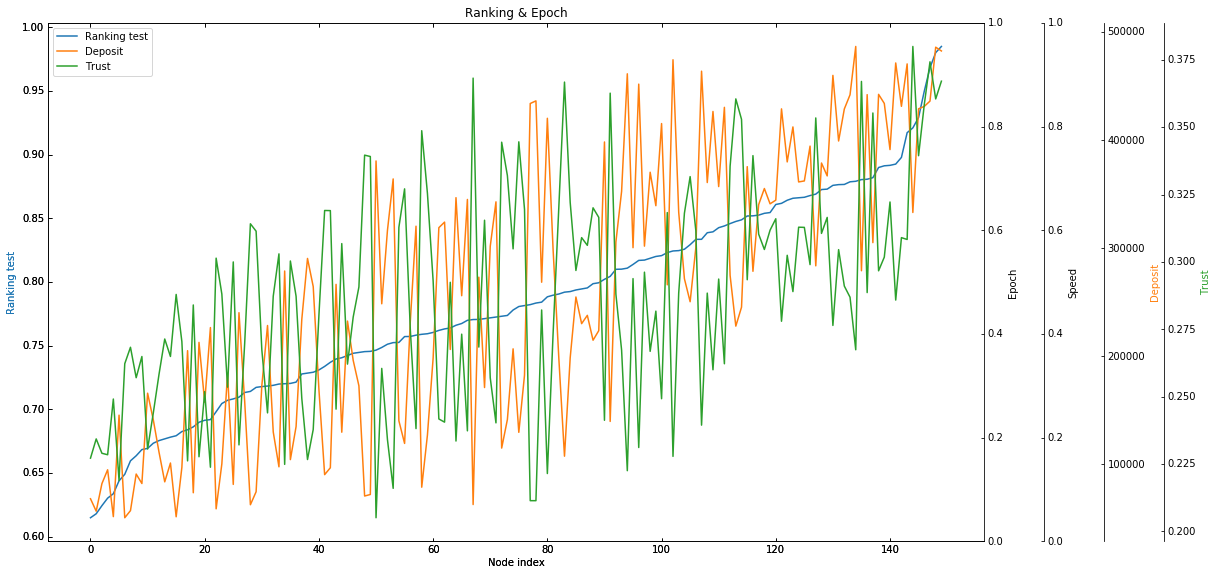

In [23]:
from mpl_toolkits.axisartist.parasite_axes import HostAxes, ParasiteAxes
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 9))

host = HostAxes(fig, [0.15, 0.1, 0.65, 0.8])
par1 = ParasiteAxes(host, sharex=host)
par2 = ParasiteAxes(host, sharex=host)
par3 = ParasiteAxes(host, sharex=host)
par4 = ParasiteAxes(host, sharex=host)
host.parasites.append(par1)
host.parasites.append(par2)
host.parasites.append(par3)
host.parasites.append(par4)

host.axis["right"].set_visible(False)
par1.axis["right"].set_visible(True)

par1.axis["right"].major_ticklabels.set_visible(True)
par1.axis["right"].label.set_visible(True)

par2.set_ylabel("Speed")
offset = (60, 0)
new_axisline = par2.get_grid_helper().new_fixed_axis
par2.axis["right2"] = new_axisline(loc="right", axes=par2, offset=offset)

par3.set_ylabel("Deposit")
offset = (120, 0)
new_axisline = par3.get_grid_helper().new_fixed_axis
par3.axis["right3"] = new_axisline(loc="right", axes=par3, offset=offset)

par4.set_ylabel("Trust")
offset = (180, 0)
new_axisline = par3.get_grid_helper().new_fixed_axis
par4.axis["right4"] = new_axisline(loc="right", axes=par4, offset=offset)


fig.add_axes(host)

host.set_xlabel("Node index")
host.set_ylabel("Ranking test")
par1.set_ylabel("Epoch")

p1, = host.plot(x_array, ranking_y_array, label="Ranking test")
# p2, = par1.plot(x_array, epoch_y_array, label="Epoch")
# p3, = par2.plot(x_array, speed_y_array, label="Speed")
p4, = par3.plot(x_array, deposit_y_array, label="Deposit")
p5, = par4.plot(x_array, trust_y_array, label="Trust")

host.legend()

host.axis["left"].label.set_color(p1.get_color())
# par1.axis["right"].label.set_color(p2.get_color())
# par2.axis["right2"].label.set_color(p3.get_color())
par3.axis["right3"].label.set_color(p4.get_color())
par4.axis["right4"].label.set_color(p5.get_color())

plt.title("Ranking & Epoch")
plt.show()

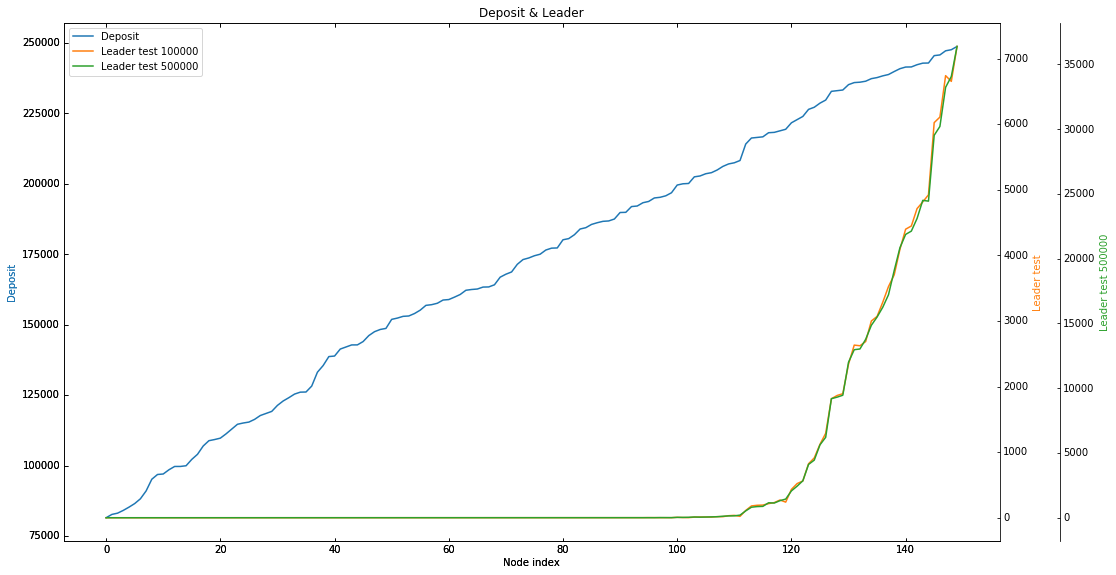

In [87]:
fig = plt.figure(figsize=(20, 9))

host = HostAxes(fig, [0.15, 0.1, 0.65, 0.8])
par1 = ParasiteAxes(host, sharex=host)
par2 = ParasiteAxes(host, sharex=host)
host.parasites.append(par1)
host.parasites.append(par2)

host.axis["right"].set_visible(False)
par1.axis["right"].set_visible(True)

par1.axis["right"].major_ticklabels.set_visible(True)
par1.axis["right"].label.set_visible(True)

par2.set_ylabel("Leader test 500000")
offset = (60, 0)
new_axisline = par2.get_grid_helper().new_fixed_axis
par2.axis["right2"] = new_axisline(loc="right", axes=par2, offset=offset)

fig.add_axes(host)
host.set_xlabel("Node index")
host.set_ylabel("Deposit")
par1.set_ylabel("Leader test")

p1, = host.plot(x_array, deposit_y_array, label="Deposit")
p2, = par1.plot(x_array, leader_test_y_array_100000, label="Leader test 100000")
p3, = par2.plot(x_array, leader_test_y_array_500000, label="Leader test 500000")

host.legend()

host.axis["left"].label.set_color(p1.get_color())
par1.axis["right"].label.set_color(p2.get_color())
par2.axis["right2"].label.set_color(p3.get_color())

plt.title("Deposit & Leader")
plt.show()

In [86]:
nodes_leader_none = []
for i in range(len(nodes)):
    if nodes[i][LEADER_TEST] == 0:
        nodes_leader_none.append(nodes[i])
# node_none
len(nodes_leader_none)

86

In [ ]:
max_node = -1
node_max_rank = -1
for i in range(len(nodes)):
    if nodes[i][RANKING] > max_node:
        max_node = nodes[i][RANKING]
        node_max_rank = nodes[i]
node_max_rank

In [ ]:
node_max_validator = -1
max_validator = -1
for i in range(len(nodes)):
    if nodes[i][NUMBER] > max_validator:
        max_validator = nodes[i][VALIDATOR_TEST]
        node_max_validator = nodes[i]
node_max_validator

In [ ]:
node_min_validator = -1
min_validator = 1000
for i in range(len(nodes)):
    if nodes[i][VALIDATOR_TEST] < min_validator:
        min_validator = nodes[i][VALIDATOR_TEST]
        node_min_validator = nodes[i]
node_min_validator

In [ ]:
min_node = 10
node_min_rank = -1
for i in range(len(nodes)):
    if nodes[i][RANKING] < min_node:
        min_node = nodes[i][RANKING]
        node_min_rank = nodes[i]
node_min_rank

In [ ]:
nodes.sort(key=lambda x: x[NODE])

In [ ]:
ranking_y_array

In [ ]:
speed_y_array

In [ ]:
trust_y_array

In [ ]:
nodes[0]

In [ ]:
arr_test = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [ ]:
for i in range(len(arr_test)):
    print(math.sqrt(arr_test[i]) - arr_test[i])

In [ ]:
ranking_y_array

In [ ]:
deposit_y_array